In [3]:
%cd ~/Dropbox/research/football/code

/Users/ajaffe/Dropbox/research/football/code


In [13]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import imageio

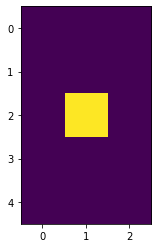

In [125]:
W=3
H=5
im = torch.zeros(H,W)
im[2,1] = 1
plt.imshow(im)

tensor([[[[-0.6667, -0.8000],
          [ 0.0000, -0.8000],
          [ 0.6667, -0.8000]],

         [[-0.6667, -0.4000],
          [ 0.0000, -0.4000],
          [ 0.6667, -0.4000]],

         [[-0.6667,  0.0000],
          [ 0.0000,  0.0000],
          [-0.6667,  0.0000]],

         [[-0.6667,  0.4000],
          [ 0.0000,  0.4000],
          [ 0.6667,  0.4000]],

         [[-0.6667,  0.8000],
          [ 0.0000,  0.8000],
          [ 0.6667,  0.8000]]]])


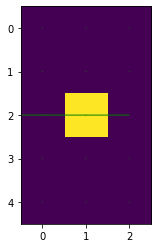

In [150]:
flow = torch.zeros(H,W,2, dtype=torch.float32)
flow[2,2] = torch.tensor([-2./W,0], dtype=torch.float32)

plt.quiver(flow[:,:,0] * W, flow[:,:,1] * H, scale=1, scale_units='xy', color='green') 

identity_affine = torch.tensor([[1,0,0],[0,1,0]], dtype=torch.float32)
# identity_affine.unsqueeze(0)
identity = F.affine_grid( \
    identity_affine.unsqueeze(0), \
    (1, 1, H, W), \
    align_corners=False
)

grid = identity + flow
print(grid)
out = F.grid_sample(im.unsqueeze(0).unsqueeze(0), grid, align_corners=False).squeeze(0).squeeze(0)
plt.imshow(out)